# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024
* Fernando Falkenberg INPE 09 Oct 2025

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to the files, which are sparc4-pipeline products.

In [2]:
path = '/media/fernando/KINGSTON/Doutorado/2025/reduced/'
date = '20250707'
object = 'V462Lup'
channel = '2'

In [3]:
db_example = f'{path}{date}/sparc4acs{channel}/{date}_sparc4acs{channel}_db.csv'
# Esse arquivo é uma tabela que contém informações de todas as imagens daquela noite, naquele canal, por exemplo, diretório, tempo de exposição, posição da lâmina, etc.

phot_lightcurve_example =f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_S+N_lc.fits'
# Esse arquivo contém várias tabelas dentro dele, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela, estão informações de cada uma das fontes detectadas pelo pipeline, para cada imagem daquele objeto, por exemplo, RA, Dec, magnitude (com seu erro), fwhm, etc.

polar_stack_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_stack.fits'
# Esse arquivo contém várias tabelas dentro dele, duas para cada abertura em que os dados do objeto foram processados (sendo uma para o feixe ordinário e a outra para o feixe extraordinário). Cada tabela contém uma linha para cada fonte identificada pelo pipeline. Para cada linha, existem informações como RA, Dec, magnitude (com seu erro), fwhm, etc. É uma versão do arquivo logo acima, só que para apenas uma imagem stack.

polar_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_polar.fits'
# Esse arquivo contém várias tabelas, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela existe uma linha para cada fonte detectada pelo pipeline. Em cada linha estão os resultados da polarimetria para aquela fonte, por exemplo, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... Além disso, também estão as contagens para cada posição de lâmina, para cada fonte, para cada imagem, com seus erros. É nesse arquivo que estão os dados importantes.

polar_time_series_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_ts.fits'
# Esse arquivo contém uma tabela com os dados da série temporal polarimétrica das fontes detectadas pelo pipeline, por exemplo, RA, Dec, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... O resultado aqui é para cada conjunto de uma medida polarimétrica.

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipeline` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [4]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:22.993000,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:24.413063,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:25.833126,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:27.253189,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:28.673251,0.3,0,0,DOMEFLAT,FLAT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:24.399501,15.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,14,L4,CLEAR,True
4584,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:42.256000,15.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,15,L4,CLEAR,True
4585,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:57.260501,15.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,15,L4,CLEAR,True
4586,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:44:14.932000,15.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,16,L4,CLEAR,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [5]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs2/20250707_s4c2_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   5R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   5R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   5R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   5R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   5R x 13C   [I11, D25.17, D25.1

Then we plot the science frame using the `sparc4.product_plots` library

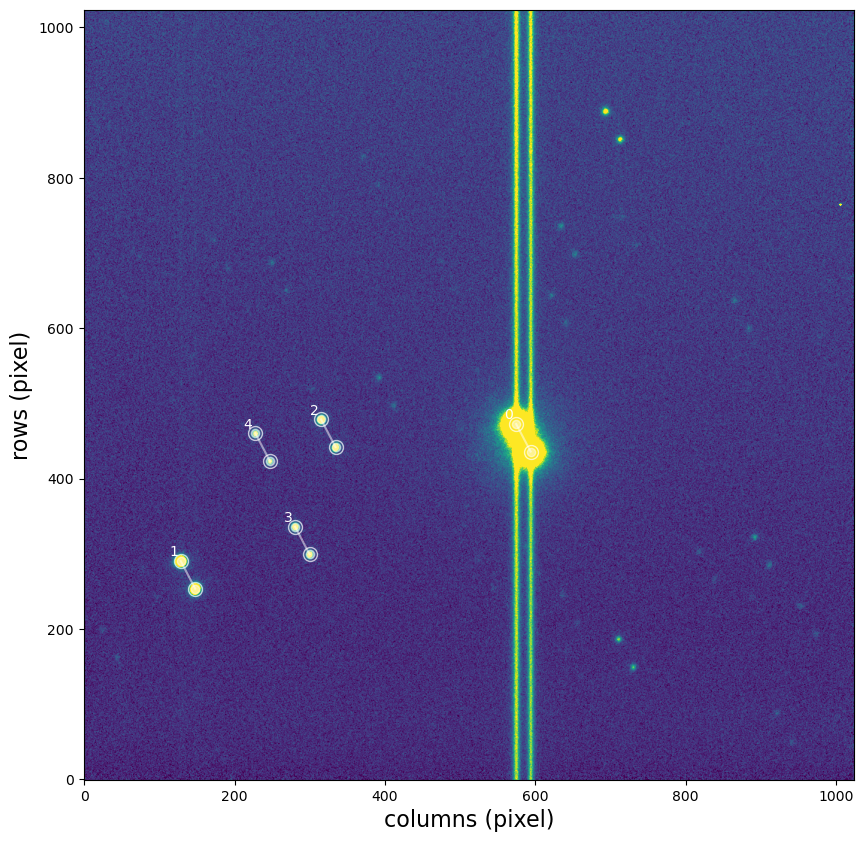

In [6]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [7]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.005741,-40.145141,593.747904,435.935954,6.811115,6.811115,-18.060218,0.001900,-11.912876,0.016449,10,0
1,1,227.060040,-40.162905,147.672196,253.561054,6.728006,6.728006,-14.024877,0.017075,-11.437319,0.018141,10,0
2,2,227.037785,-40.144982,334.270116,441.963828,6.498037,6.498037,-12.636133,0.049297,-11.527373,0.016464,10,0
3,3,227.041672,-40.158465,299.713400,299.358597,6.410313,6.410313,-12.178793,0.072091,-11.457962,0.017116,10,0
4,4,227.048450,-40.146862,246.912236,423.305865,6.324981,6.324981,-11.711335,0.108085,-11.497800,0.016822,10,0


Below we select the source with its index number assigned as the main target to be analyzed. Then we select other stars as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

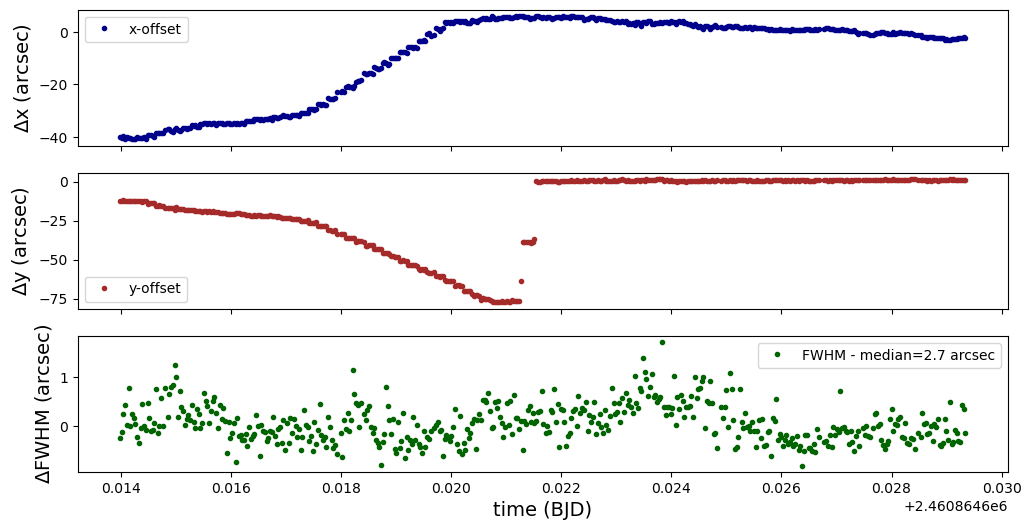

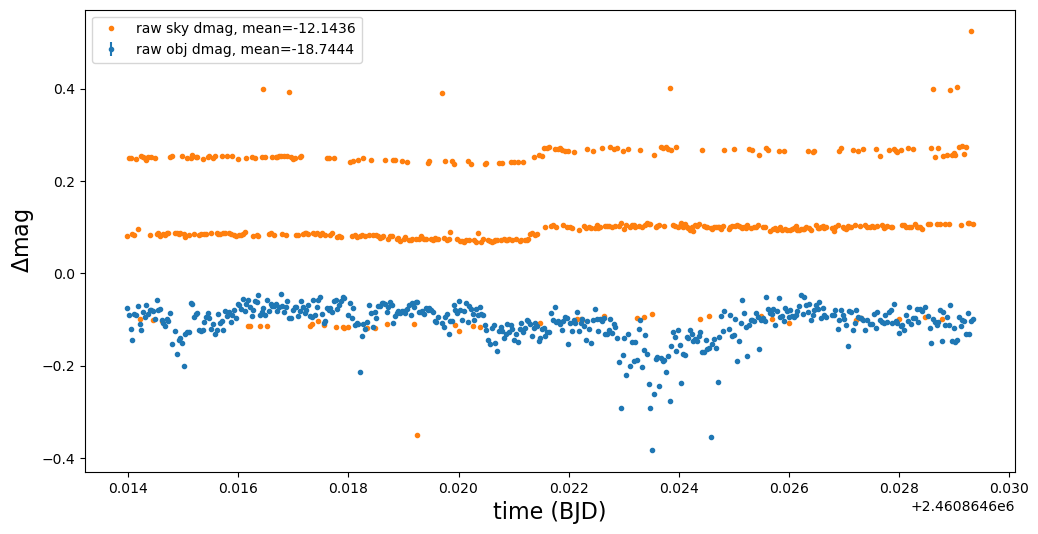

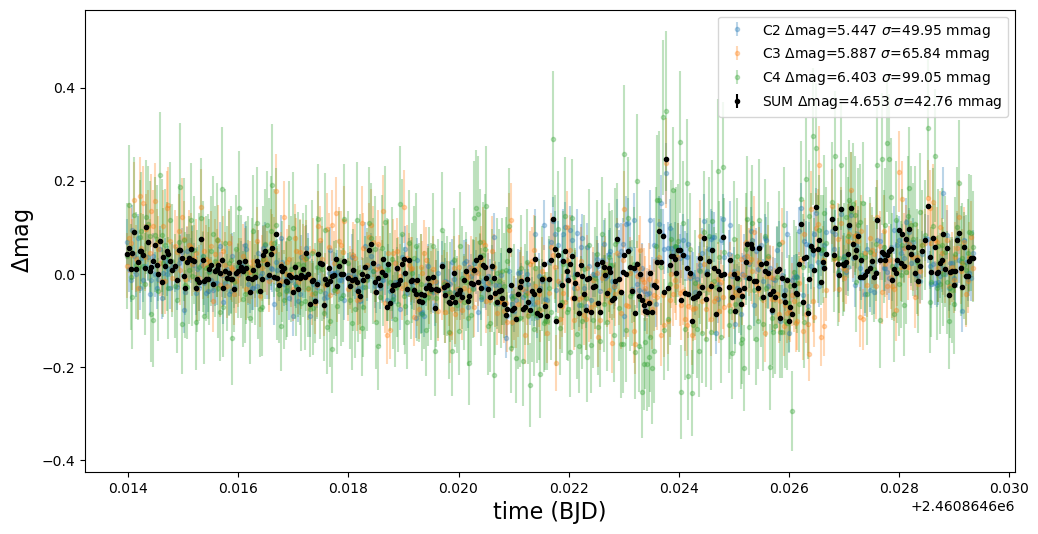

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
 2460864.613983104 584.1609102863845 ...  0.043075661326957615
 2460864.614015671 582.9109102863845 ...   0.05479166637921473
2460864.6140463515 585.9109102863845 ...  0.010170544332460452
 2460864.614076801 582.1609102863845 ...   0.04411871733974415
2460864.6141079795 584.6609102863845 ...   0.09014661059015161
 2460864.614141553 583.4109102863845 ...  0.010708853824624498
2460864.6141722226 583.1609102863845 ...  0.026075523387877553
               ...               ... ...                   ...
2460864.6291519534 695.9109102863845 ... -0.027629046913068223
2460864.6291826107 696.4109102863845 ...   0.05681341086953573
 2460864.629213801 696.9109102863845 ... -0.004068608410571883
 2460864.629245685 696.9109102863845 ... -0.004092891811337651
 2460864.629276678 696.9109102863845 ...  0.027349852492170257
 2460864.629308354 697.9109102863845 ...  0.03442113926

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs2/20250707_s4c2_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    2907   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   3922   5R x 1955C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0477,EFE0477,FO0478,EFO0478,FE0478,EFE0478,FO0479,EFO0479,FE0479,EFE0479
0,2.0,10.0,0.0,227.005741,-40.145141,574.573916,472.448944,593.747904,435.935954,5.791732,...,1.417800e+07,27508.169679,1.682511e+07,29825.884252,1.456160e+07,27839.029875,1.685138e+07,29824.831147,1.464186e+07,27894.468310
1,2.0,10.0,1.0,227.060040,-40.162905,128.367178,290.407850,147.672196,253.561054,5.782779,...,3.156189e+05,7353.503754,4.194392e+05,7773.536300,3.478721e+05,7466.632960,3.974952e+05,7649.976477,3.482725e+05,7485.526882
2,2.0,10.0,2.0,227.037785,-40.144982,315.093594,478.635938,334.270116,441.963828,6.091831,...,9.379100e+04,6533.671438,1.191202e+05,6739.537766,9.079200e+04,6618.116512,1.096561e+05,6618.736697,9.071852e+04,6526.742510
3,2.0,10.0,3.0,227.041672,-40.158465,280.517211,336.047646,299.713400,299.358597,6.366409,...,6.133354e+04,6349.316744,7.096044e+04,6533.230174,5.804098e+04,6452.034383,7.673798e+04,6452.870564,6.078650e+04,6382.337206
4,2.0,10.0,4.0,227.048450,-40.146862,227.697542,460.171419,246.912236,423.305865,6.907825,...,3.214812e+04,6312.079319,4.802603e+04,6499.880429,3.145981e+04,6387.551604,5.054665e+04,6395.673562,3.144564e+04,6319.589826


Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0477', 'EFE0477', 'FO0478', 'EFO0478', 'FE0478', 'EFE0478', 'FO0479',
       'EFO0479', 'FE0479', 'EFE0479'],
      dtype='object', length=1955)

Finally, we can select the source of interest and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-10-09 17:05:01,539 astropop - INFO - Normalization disabled.  [__init__]


2025-10-09 17:05:01,539 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-10-09 17:05:01,564 root - INFO - Source index: i=0   [pipeline_lib]


2025-10-09 17:05:01,564 | INFO | Source index: i=0 


2025-10-09 17:05:01,566 root - INFO - Source RA=227.0057407119194 Dec=-40.14514076757627 mag=-25.54094+-0.00007  [pipeline_lib]


2025-10-09 17:05:01,566 | INFO | Source RA=227.0057407119194 Dec=-40.14514076757627 mag=-25.54094+-0.00007


2025-10-09 17:05:01,570 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-10-09 17:05:01,570 | INFO | Best aperture radius: 20.0 pixels


2025-10-09 17:05:01,574 root - INFO - Polarization in Q: -0.0001+-0.0002  [pipeline_lib]


2025-10-09 17:05:01,574 | INFO | Polarization in Q: -0.0001+-0.0002


2025-10-09 17:05:01,576 root - INFO - Polarization in U: -0.0012+-0.0004  [pipeline_lib]


2025-10-09 17:05:01,576 | INFO | Polarization in U: -0.0012+-0.0004


2025-10-09 17:05:01,578 root - INFO - Polarization in V: 0.0000+-0.0002  [pipeline_lib]


2025-10-09 17:05:01,578 | INFO | Polarization in V: 0.0000+-0.0002


2025-10-09 17:05:01,582 root - INFO - Total linear polarization p: 0.0012+-0.0004  [pipeline_lib]


2025-10-09 17:05:01,582 | INFO | Total linear polarization p: 0.0012+-0.0004


2025-10-09 17:05:01,584 root - INFO - Angle of polarization theta: 134+-8 deg  [pipeline_lib]


2025-10-09 17:05:01,584 | INFO | Angle of polarization theta: 134+-8 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-10-09 17:05:01,588 root - INFO - Free constant k: 1.144965363568308+-0.0  [pipeline_lib]


2025-10-09 17:05:01,588 | INFO | Free constant k: 1.144965363568308+-0.0


2025-10-09 17:05:01,591 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-10-09 17:05:01,591 | INFO | Zero of polarization: 27.2+-0.0


2025-10-09 17:05:01,594 root - INFO - RMS of zi residuals: 0.002817494463231253  [pipeline_lib]


2025-10-09 17:05:01,594 | INFO | RMS of zi residuals: 0.002817494463231253


2025-10-09 17:05:01,595 root - INFO - Reduced chi-square (n=480.0, DOF=477.0): 4.48  [pipeline_lib]


2025-10-09 17:05:01,595 | INFO | Reduced chi-square (n=480.0, DOF=477.0): 4.48


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-10-09 17:05:01,698 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:05:01,698 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:05:01,703 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:05:01,703 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:05:01,939 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:05:01,939 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:05:01,944 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:05:01,944 | INFO | Substituting symbol \perp from STIXGeneral


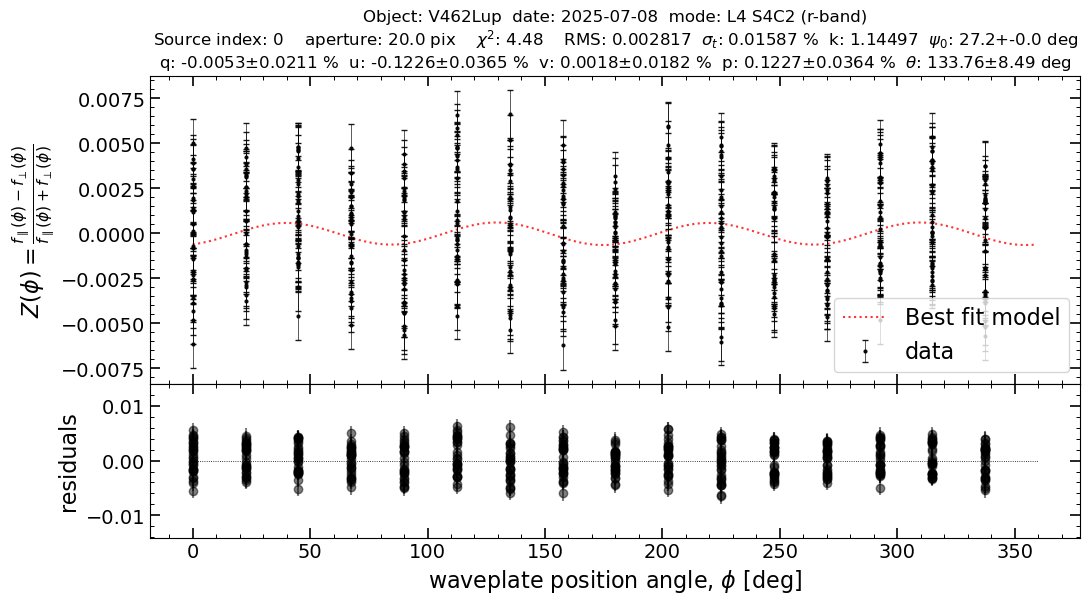

In [12]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs2/20250707_s4c2_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
SOURCE_INDEX : 0
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 480
MAG : -25.54094+-0.00007
RA : 227.0057407119194
DEC : -40.14514076757627
FWHM : 5.79173175924077
X1 : 574.5739164231115
Y1 : 472.44894352436614
X2 : 593.7479041496574
Y2 : 435.93595374740306
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180. 

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.12+-0.04 %  Angle of polarization: 134+-8 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

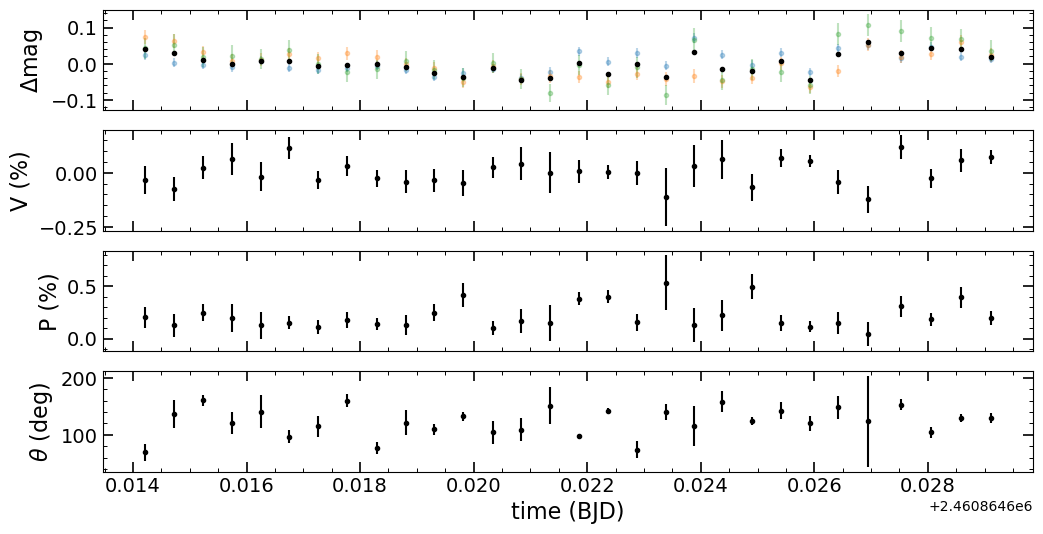

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.023250993019839683,0.012283221199043874,0.07449450177613048,0.018813357709310995,0.0426098468117706,0.02890577132709593,2460864.61421752,574.5739164231115,472.44894352436614,593.7479041496574,435.93595374740306,5.7890648495362775,-21.761714278080774,0.00035091219329110544,-17.0682632306778,0.03660593052000307,0.04090423901112317,0.0020074729769147246,0.0010155179529154875,69.15891542629026,14.46784778045692
0.002853621514589122,0.012234173127075974,0.06216828821762643,0.018899704818505145,0.05161175544786456,0.029626738926757875,2460864.6147297295,577.3239164231115,466.69894352436614,596.4979041496574,430.18595374740306,6.458073878988532,-21.7420747110528,0.0003542534377070231,-17.060668862676142,0.03720538949224672,0.028859039984808987,0.0012508768724839305,0.0011024809102504582,136.29534250609666,25.207080510290726
-0.0032349432938652,0.012131542864076717,0.03157284369551849,0.018313255795924296,0.01866877209507134,0.028642201841574334,2460864.6152403764,585.3239164231115,460.69894352436614,604.4979041496574,424.18595374740306,6.227408338392167,-21.7465293984861,0.00035347556686167995,-17.084185147929936,0.03609086534726294,0.009797442164312997,0.0024601046216604994,0.0008299540515077079,160.2740481688126,9.648648949368205
-0.010267810689548185,0.011958302900249636,0.008360311253054142,0.017808709536088554,0.02217707018007875,0.02848152355150194,2460864.6157470825,590.5739164231115,453.69894352436614,609.7479041496574,417.18595374740306,6.394854811800501,-21.754488704424098,0.00035211569221616564,-17.102196436928455,0.03565075554637707,-0.00025454089620779996,0.001945433464221679,0.0013583370818837242,120.76114230084639,19.969040965077077
0.008423288795071926,0.011863318420426015,0.010830610937916596,0.017391887514940647,0.013301789869909264,0.027571027082496227,2460864.616252828,590.0739164231115,448.19894352436614,609.2479041496574,411.68595374740306,5.384385574722753,-21.782020060104962,0.0003473643342693873,-17.121675681000042,0.03468451561890898,0.007797570713069746,0.001256452467766133,0.0012733354122753554,140.02142499206633,28.984298033830303
-0.011229432688107721,0.011703903039170526,0.026205377566427934,0.01770245797855413,0.036697298089722885,0.028181934201427263,2460864.6167541817,594.3239164231115,445.19894352436614,613.4979041496574,408.68595374740306,5.424972592294962,-21.781398868288644,0.00034753889207141705,-17.121080244623684,0.035273466378027675,0.007771815273109439,0.0015232753246620474,0.0006008898374925621,96.84267304327811,11.281906214886023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.023047158703239035,0.011694942184371797,-0.06395611584591787,0.016485239074195412,-0.0592880141786134,0.02610266277262314,2460864.625921076,698.8239164231115,511.19894352436614,717.9979041496574,474.68595374740306,5.241340913702574,-21.767629655991172,0.00034985017390403567,-17.161021530548112,0.03300782632070646,-0.045938682948790444,0.0011124755168150646,0.000536023872271226,119.84898359740451,13.780332704171803
0.042662180288907336,0.012334212291414667,-0.019424427304429948,0.017023517598872284,0.0822065118112123,0.029513123343576055,2460864.6264174934,697.5739164231115,512.6989435243661,716.7479041496574,476.18595374740306,4.890343373970815,-21.77891110621166,0.00034787053840909754,-17.09862345941431,0.03622974402403989,0.027740838405499346,0.0015078016681406158,0.0010405464932528826,147.8183996144591,19.73709827747524


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)